# Classification of Antarctic Penguins

Julia Silge  
July 28, 2020

# Introduction

This document explores the classification of Antarctic penguins based on morphological characteristics using logistic regression and random forest models. The dataset used is the Palmer Penguins dataset.

# Load Packages

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.2.0     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

# Prepare Data

In [ ]:
penguins_df <- penguins %>%
  filter(!is.na(sex)) %>%
  select(-island)

set.seed(123)
penguin_split <- initial_split(penguins_df, strata = sex)
penguin_train <- training(penguin_split)
penguin_test <- testing(penguin_split)

set.seed(123)
penguin_boot <- bootstraps(penguin_train)
penguin_boot


# Bootstrap sampling 
# A tibble: 25 × 2
   splits           id         
   <list>           <chr>      
 1 <split [249/93]> Bootstrap01
 2 <split [249/91]> Bootstrap02
 3 <split [249/90]> Bootstrap03
 4 <split [249/91]> Bootstrap04
 5 <split [249/85]> Bootstrap05
 6 <split [249/87]> Bootstrap06
 7 <split [249/94]> Bootstrap07
 8 <split [249/88]> Bootstrap08
 9 <split [249/95]> Bootstrap09
10 <split [249/89]> Bootstrap10
# ℹ 15 more rows

# Model Specifications

## Logistic Regression

In [ ]:
glm_spec <- logistic_reg() %>%
  set_engine("glm")
glm_spec


Logistic Regression Model Specification (classification)

Computational engine: glm 

## Random Forest

In [ ]:
rf_spec <- rand_forest() %>%
  set_mode("classification") %>%
  set_engine("ranger")
rf_spec


Random Forest Model Specification (classification)

Computational engine: ranger 

# Workflow

In [ ]:
penguin_wf <- workflow() %>%
  add_formula(sex ~ .)
penguin_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Formula
Model: None

── Preprocessor ────────────────────────────────────────────────────────────────
sex ~ .

# Fit Models

## Logistic Regression

In [ ]:
glm_rs <- penguin_wf %>%
  add_model(glm_spec) %>%
  fit_resamples(
    resamples = penguin_boot,
    control = control_resamples(save_pred = TRUE)
  )


→ A | warning: glm.fit: fitted probabilities numerically 0 or 1 occurred

There were issues with some computations   A: x1

There were issues with some computations   A: x3

# Resampling results
# Bootstrap sampling 
# A tibble: 25 × 5
   splits           id          .metrics         .notes           .predictions
   <list>           <chr>       <list>           <list>           <list>      
 1 <split [249/93]> Bootstrap01 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 2 <split [249/91]> Bootstrap02 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 3 <split [249/90]> Bootstrap03 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 4 <split [249/91]> Bootstrap04 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 5 <split [249/85]> Bootstrap05 <tibble [3 × 4]> <tibble [1 × 3]> <tibble>    
 6 <split [249/87]> Bootstrap06 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 7 <split [249/94]> Bootstrap07 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 8 <split [249/88]> Bootstrap08 <tibble [3 × 4]> <tibble [1 × 3]> <tibble>    
 9 <split [249/95]> Bootstrap09 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
10 <split [249/89]> Bootstrap10 <tibble [3 × 4]> <tibble [0 × 3]> <ti

## Random Forest

In [ ]:
rf_rs <- penguin_wf %>%
  add_model(rf_spec) %>%
  fit_resamples(
    resamples = penguin_boot,
    control = control_resamples(save_pred = TRUE)
  )
rf_rs


# Resampling results
# Bootstrap sampling 
# A tibble: 25 × 5
   splits           id          .metrics         .notes           .predictions
   <list>           <chr>       <list>           <list>           <list>      
 1 <split [249/93]> Bootstrap01 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 2 <split [249/91]> Bootstrap02 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 3 <split [249/90]> Bootstrap03 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 4 <split [249/91]> Bootstrap04 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 5 <split [249/85]> Bootstrap05 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 6 <split [249/87]> Bootstrap06 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 7 <split [249/94]> Bootstrap07 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 8 <split [249/88]> Bootstrap08 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
 9 <split [249/95]> Bootstrap09 <tibble [3 × 4]> <tibble [0 × 3]> <tibble>    
10 <split [249/89]> Bootstrap10 <tibble [3 × 4]> <tibble [0 × 3]> <ti

# Evaluate Models

# A tibble: 3 × 6
  .metric     .estimator   mean     n std_err .config             
  <chr>       <chr>       <dbl> <int>   <dbl> <chr>               
1 accuracy    binary     0.912     25 0.00547 Preprocessor1_Model1
2 brier_class binary     0.0664    25 0.00240 Preprocessor1_Model1
3 roc_auc     binary     0.977     25 0.00202 Preprocessor1_Model1

# A tibble: 3 × 6
  .metric     .estimator   mean     n std_err .config             
  <chr>       <chr>       <dbl> <int>   <dbl> <chr>               
1 accuracy    binary     0.918     25 0.00639 Preprocessor1_Model1
2 brier_class binary     0.0585    25 0.00424 Preprocessor1_Model1
3 roc_auc     binary     0.979     25 0.00254 Preprocessor1_Model1

# A tibble: 4 × 3
  Prediction Truth   Freq
  <fct>      <fct>  <dbl>
1 female     female  41.1
2 female     male     3  
3 male       female   4.4
4 male       male    42.3

ℹ Please use `linewidth` instead.

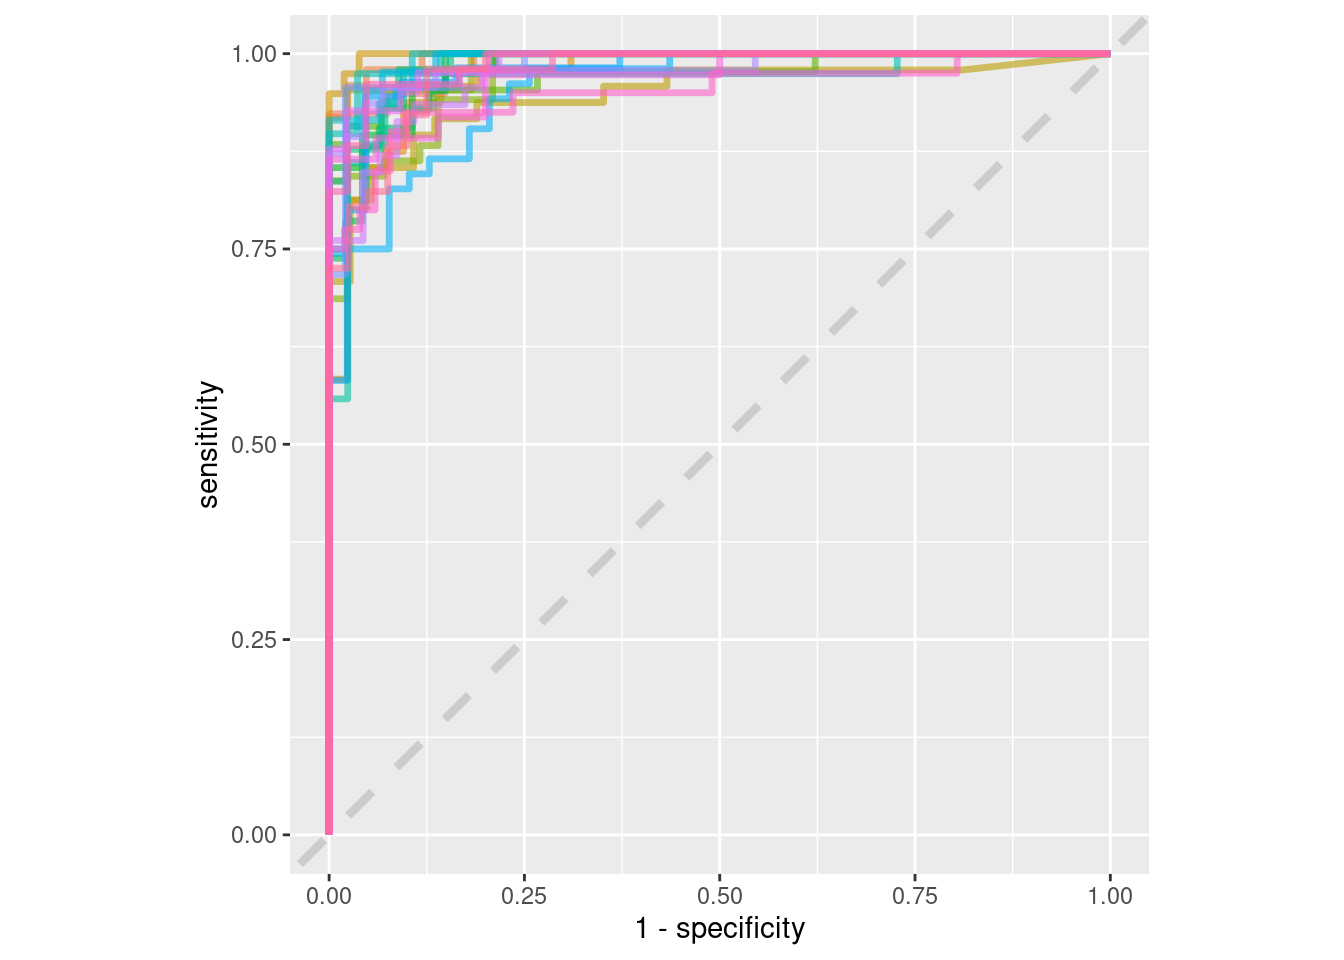

In [ ]:
collect_metrics(rf_rs)


# Final Fit and Interpretation

In [ ]:
penguin_final <- penguin_wf %>%
  add_model(glm_spec) %>%
  last_fit(penguin_split)

collect_metrics(penguin_final)


# A tibble: 3 × 4
  .metric     .estimator .estimate .config             
  <chr>       <chr>          <dbl> <chr>               
1 accuracy    binary         0.857 Preprocessor1_Model1
2 roc_auc     binary         0.938 Preprocessor1_Model1
3 brier_class binary         0.101 Preprocessor1_Model1

          Truth
Prediction female male
    female     37    7
    male        5   35

In [ ]:

penguin_final$.workflow[[1]] %>%
  tidy(exponentiate = TRUE) %>%
  kbl(
    caption = "Logistic Regression Classigication Model Coefficients",
    digits = 3,
    col.names = str_to_title(names(.))) %>%
  kable_styling(
    full_width = FALSE,
    bootstrap_options = c("striped", "hover"),
    font_size = 14
  )


Term,Estimate,Std.error,Statistic,P.value
(Intercept),0.000,19.620,-5.309,0.000
speciesChinstrap,0.000,2.344,-3.794,0.000
speciesGentoo,0.000,3.753,-3.032,0.002
bill_length_mm,1.908,0.180,3.597,0.000
bill_depth_mm,8.363,0.478,4.448,0.000
flipper_length_mm,1.058,0.061,0.926,0.355
body_mass_g,1.008,0.002,4.591,0.000


# Data Visualization

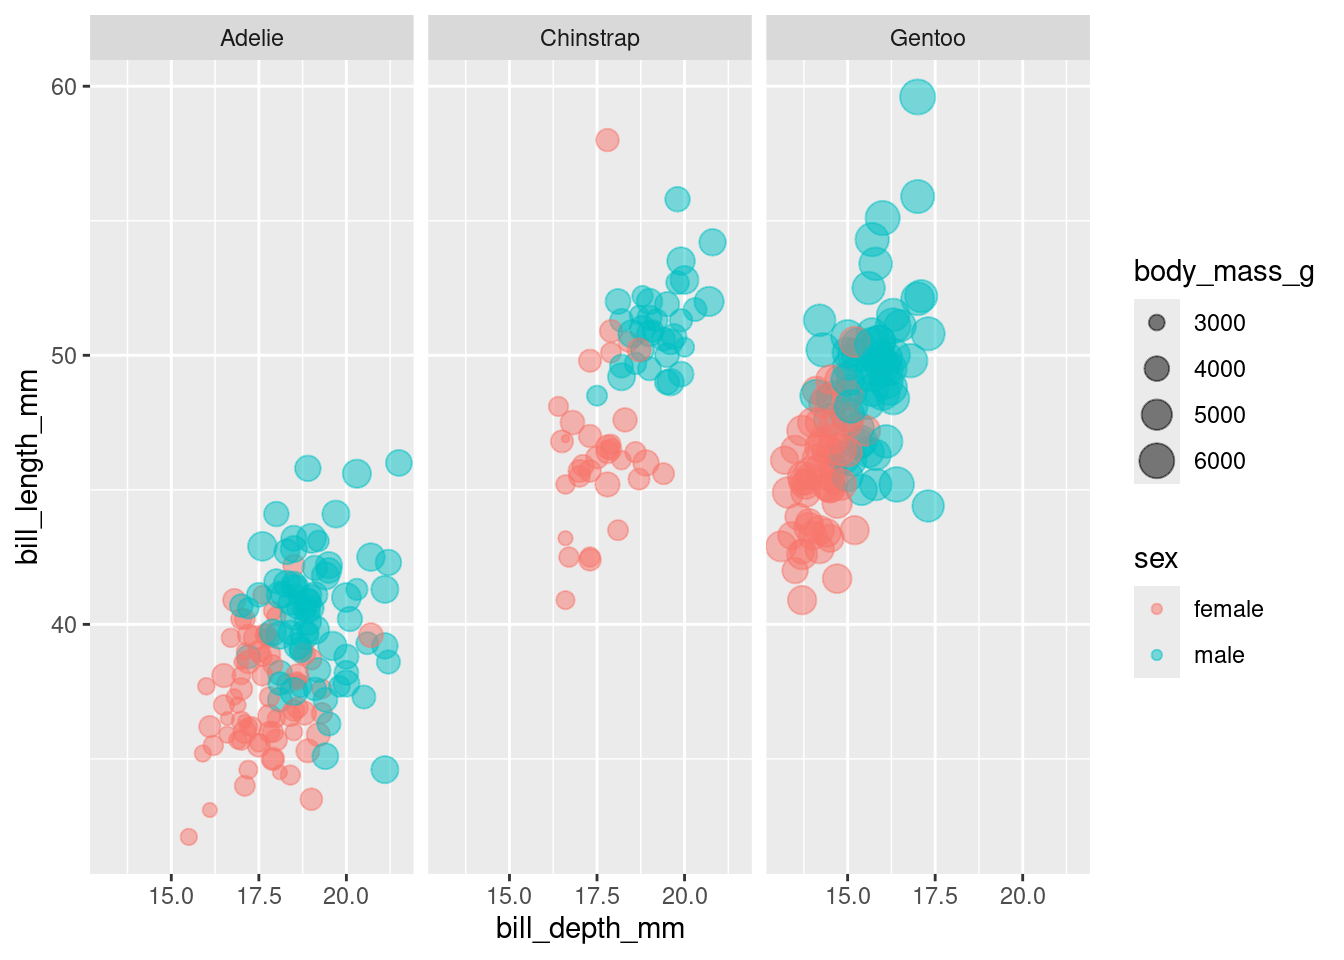

In [ ]:
penguins %>%
  filter(!is.na(sex)) %>%
  ggplot(aes(bill_depth_mm, bill_length_mm, color = sex, size = body_mass_g)) +
  geom_point(alpha = 0.5) +
  facet_wrap(~species)
